#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until 1st January of 2023, and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [59]:
!pip install yfinance
!pip install AutoTS

In [60]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

###To continue our capture strategy, we need to pass some informations

In [61]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1590) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [62]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,8.45770,9.122590,8.21718,8.83777,8.83777,104789000,2018-01-02
1,8.77014,9.580780,8.52918,9.53588,9.53588,108852000,2018-01-03
2,9.44584,9.538490,8.85413,9.21399,9.21399,158819008,2018-01-04
3,9.14568,16.717699,9.09468,14.91720,14.91720,341504992,2018-01-05
4,14.86890,23.508200,14.82120,22.75980,22.75980,637020992,2018-01-06


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [63]:
#First of all, let's see the total of rows and columns

df.shape

(1591, 7)

In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1.591000e+03
mean,132.349057,137.130650,127.109615,132.496301,132.496301,9.689984e+08
std,189.677120,196.169117,182.322897,189.609368,189.609368,1.529743e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.913670,14.407000,13.483473,13.924100,13.924100,1.279396e+08
50%,21.889606,22.484980,20.990204,21.911144,21.911144,2.982503e+08
75%,293.283279,305.666107,274.385300,293.552185,293.552185,1.464828e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [65]:
import plotly.graph_objects as go

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

figure.show()

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [66]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = ((x1/x2)-1)*100

print(x,"%")

14820.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

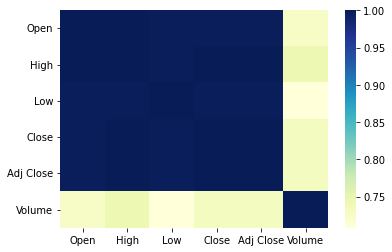

In [67]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu")

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the end of year (considering i made this study in 2021's may), so the time delta will be 235 days.

In [68]:
#Importing our machine learning library

from autots import AutoTS

model = AutoTS(forecast_length = 235, frequency = 'infer', ensemble = 'simple')
model = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

prediction = model.predict()
forecast = prediction.forecast


Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
43/43 [==============================] - 12s 9ms/step - loss: 0.4179
Epoch 2/50
43/43 [==============================] - 0s 11ms/step - loss: 0.4168
Epoch 3/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4159
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4143
Epoch 5/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4101
Epoch 6/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4072
Epoch 7/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4040
Epoch 8/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4017
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3986
Epoch 10/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4010
Epoch 11/50
43/43 [==============================] - 0s 9ms/step - loss: 0.3968
Epoch 12/50
43/43 [==============================] - 0s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 47 with model FBProphet in generation 0 of 10
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 w

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 97 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 97: GluonTS
Model Number: 98 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 98: WindowRegression
Model Number: 99 with model FBProphet in generation 0 of 10
Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (235, 1), got (235,).') in model 101: UnobservedComponents
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 111 with model MultivariateMotif in generation 0 of 10
Model Number: 112 with model DatepartRegression in generation 0 of 10
Epoch 1/100
17/17 [==============================] - 8s 71ms/step - loss: 1.7365 - val_loss: 3.6631
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 0.7635 - val_loss: 3.5748
Epoch 3/100
17/17 [==============================] - 1s 41ms/step - loss: 0.6175 - val_loss: 3.5596
Epoch 4/100
17/17 [==============================] - 1s 39ms/step - loss: 0.5652 - val_loss: 3.5688
Epoch 5/100
17/17 [==============================] - 1s 39ms/step - loss: 0.4686 - val_loss: 3.5717
Epoch 6/100
17/17 [==============================] - 1s 41ms/step - loss: 0.4396 - val_loss: 3.5591
Epoch 7/100
17/17 [==============================] - 1s 40ms/step - loss: 0.3625 - val_loss: 3.5563
Epoch 8/100
17/17 [==============================] - 1s 39ms/step - loss: 0.3480 - val_loss: 3.5544
Epoch 9/100
17/17 [==============================] - 1s 40ms/

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 126 with model FBProphet in generation 0 of 10
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 130: Theta
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 133: Theta
Model 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.373e+06, tolerance: 2.649e+03



Model Number: 181 with model DatepartRegression in generation 1 of 10
Model Number: 182 with model DatepartRegression in generation 1 of 10
Model Number: 183 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 183: DatepartRegression
Model Number: 184 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 184: WindowRegression
Model Number: 185 with model WindowRegression in generation 1 of 10
Model Number: 186 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 186: WindowRegression
Model Number: 187 with model GLS in generation 1 of 10
Model Number: 188 with model GLS in generation 1 of 10
Model Number: 189 with model GLS in generation 1 of 10
Model Number: 190 with model Sectio

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 195 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 196 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 197 with model FBProphet in generation 1 of 10
Model Number: 198 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 198: GLM
Model Number: 199 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 199: GLM
Model Number: 200 with model GLM in generation 1 of 10
Model Number: 201 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 201: GLM
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError(

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 262 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 262: DatepartRegression
Model Number: 263 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 263: DatepartRegression
Model Number: 264 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 264: DatepartRegression
Model Number: 265 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 266 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 267 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 268 with model FBProphet in generation 2 of 10
Model Number: 269 with model SectionalMotif in generation 2 of 10
Model Number: 270 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 270: SectionalMotif
Model Number: 271 with model SectionalMotif in generation 2 of 10
Model Number: 272 with model SectionalMotif in generation 2 of 10
Model Number: 273 with model GLM in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 274 with model GLM in generation 2 of 10
Model Number: 275 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 275: GLM
Model Number: 276 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 276: GLM
Model Number: 277 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 277: GluonTS
Model Number: 278 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 278: GluonTS
Model Number: 279 with model GluonTS in generation 2 of 10
Te

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



Template Eval Error: ValueError('Only gave one variable to VECM') in model 286: VECM
Model Number: 287 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 287: VECM
Model Number: 288 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 288: VECM
Model Number: 289 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 289: Theta
Model Number: 290 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 290: Theta
Model Number: 291 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 291: Theta
Model Number: 292 with model Theta in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+05, tolerance: 3.316e+04



Model Number: 326 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 326: WindowRegression
Model Number: 327 with model ZeroesNaive in generation 3 of 10
Model Number: 328 with model ZeroesNaive in generation 3 of 10
Model Number: 329 with model ZeroesNaive in generation 3 of 10
Model Number: 330 with model MultivariateMotif in generation 3 of 10
Model Number: 331 with model MultivariateMotif in generation 3 of 10
Model Number: 332 with model MultivariateMotif in generation 3 of 10
Model Number: 333 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 333: MultivariateMotif
Model Number: 334 with model GLS in generation 3 of 10
Model Number: 335 with model GLS in generation 3 of 10
Model Number: 336 with model GLS in generation 3 of 10
Model Number: 337 with model DatepartR

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 343 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 344 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 345 with model FBProphet in generation 3 of 10
Model Number: 346 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 346: FBProphet
Model Number: 347 with model SectionalMotif in generation 3 of 10
Model Number: 348 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 348: SectionalMotif
Model Number: 349 with model SectionalMotif in generation 3 of 10
Model Number: 350 with model SectionalMotif in generation 3 of 10
Model Number: 351 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 351: GluonTS
Model Number: 352 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompa

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 354 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 354: GluonTS
Model Number: 355 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 355: VAR
Model Number: 356 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 356: VAR
Model Number: 357 with model VAR in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 357: VAR
Model Number: 358 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 358: VAR
Model Number: 359 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 359: VECM
Model Number: 360 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 402 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 403 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 404 with model FBProphet in generation 4 of 10
Model Number: 405 with model ZeroesNaive in generation 4 of 10
Model Number: 406 with model ZeroesNaive in generation 4 of 10
Model Number: 407 with model ZeroesNaive in generation 4 of 10
Model Number: 408 with model MultivariateMotif in generation 4 of 10
Model Number: 409 with model MultivariateMotif in generation 4 of 10
Model Number: 410 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 410: MultivariateMotif
Model Number: 411 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 411: MultivariateMotif
Model Number: 412 with model GLS in generation 4 of 10
Model Number: 413 with model GLS in generation 4 of 10
Model Number: 414 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

Model Number: 417 with model GLM in generation 4 of 10
Model Number: 418 with model GLM in generation 4 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 418: GLM
Model Number: 419 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 419: GLM
Model Number: 420 with model GLM in generation 4 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 420: GLM
Model Number: 421 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 424 with model SectionalMotif in generation 4 of 10
Model Number: 425 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 425: GluonTS
Model Number: 426 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 426: GluonTS
Model Number: 427 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 427: GluonTS
Model Number: 428 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 428: GluonTS
Model Number: 429 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 429: VAR
Mode

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+01, tolerance: 1.132e-02



Template Eval Error: ValueError('Only gave one variable to VECM') in model 435: VECM
Model Number: 436 with model VECM in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 436: VECM
Model Number: 437 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 437: Theta
Model Number: 438 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 438: Theta
Model Number: 439 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 439: Theta
Model Number: 440 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 440: Theta
Model Number: 441 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import na

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 447 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 447: WindowRegression
Model Number: 448 with model LastValueNaive in generation 5 of 10
Model Number: 449 with model MultivariateRegression in generation 5 of 10
Model Number: 450 with model MultivariateRegression in generation 5 of 10
Model Number: 451 with model MultivariateRegression in generation 5 of 10
Model Number: 452 with model MultivariateRegression in generation 5 of 10
Model Number: 453 with model UnobservedComponents in generation 5 of 10
Model Number: 454 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (235, 1), got (235,).') in model 454: UnobservedComponents
Model Number: 455 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Provided exogenou

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 472 with model NVAR in generation 5 of 10
Model Number: 473 with model NVAR in generation 5 of 10
Model Number: 474 with model NVAR in generation 5 of 10
Model Number: 475 with model AverageValueNaive in generation 5 of 10
Model Number: 476 with model AverageValueNaive in generation 5 of 10
Model Number: 477 with model AverageValueNaive in generation 5 of 10
Model Number: 478 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 478: FBProphet
Model Number: 479 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'RollingMeanTransformer'}, 'transformation_params': {'0': {}, '1': {'fixed': True, 'window': 12}}}. fail_on_forecast_nan=True") in model 479: FBProphet
Model Number: 480 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 481 with model FBProphet in generation 5 of 10
Model Number: 482 with model ZeroesNaive in generation 5 of 10
Model Number: 483 with model ZeroesNaive in generation 5 of 10
Model Number: 484 with model ZeroesNaive in generation 5 of 10
Model Number: 485 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 485: MultivariateMotif
Model Number: 486 with model MultivariateMotif in generation 5 of 10
Model Number: 487 with model MultivariateMotif in generation 5 of 10
Model Number: 488 with model MultivariateMotif in generation 5 of 10
Model Number: 489 with model GLS in generation 5 of 10
Model Number: 490 with model GLS in generation 5 of 10
Model Number: 491 with model GLS in generation 5 of 10
Model Number: 492 with model DatepartRegression in generation 5 of 10
Model Number: 493 with model DatepartRegression in generation 5 of 10
Model Number: 494 with model DatepartRegression i

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in multiply



Template Eval Error: ValueError('Only gave one variable to VECM') in model 510: VECM
Model Number: 511 with model Theta in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 511: Theta
Model Number: 512 with model Theta in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 512: Theta
Model Number: 513 with model Theta in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 513: Theta
Model Number: 514 with model Theta in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 514: Theta
Model Number: 515 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 515: ARDL
Model Number: 516 with model ARDL in generation 5 of 10
Template Eval Error: Val

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 526 with model MultivariateRegression in generation 6 of 10
Model Number: 527 with model AverageValueNaive in generation 6 of 10
Model Number: 528 with model AverageValueNaive in generation 6 of 10
Model Number: 529 with model AverageValueNaive in generation 6 of 10
Model Number: 530 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 530: UnobservedComponents
Model Number: 531 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (235, 1), got (235,).') in model 531: UnobservedComponents
Model Number: 532 with model UnobservedComponents in generation 6 of 10
Model Number: 533 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 534 with model ETS in generation 6 of 10
ETS error TypeError("_

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 552 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 553 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 554 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 555 with model FBProphet in generation 6 of 10
Model Number: 556 with model ZeroesNaive in generation 6 of 10
Model Number: 557 with model ZeroesNaive in generation 6 of 10
Model Number: 558 with model MultivariateMotif in generation 6 of 10
Model Number: 559 with model MultivariateMotif in generation 6 of 10
Model Number: 560 with model MultivariateMotif in generation 6 of 10
Model Number: 561 with model MultivariateMotif in generation 6 of 10
Model Number: 562 with model GLS in generation 6 of 10
Model Number: 563 with model GLS in generation 6 of 10
Model Number: 564 with model GLS in generation 6 of 10
Model Number: 565 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 565: DatepartRegression
Model Number: 566 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 566: Datepar

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 568 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 568: GLM
Model Number: 569 with model GLM in generation 6 of 10
Model Number: 570 with model GLM in generation 6 of 10
Model Number: 571 with model GLM in generation 6 of 10
Model Number: 572 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 572: GluonTS
Model Number: 573 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 573: GluonTS
Model Number: 574 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 574: GluonTS
Model Number: 575 with model GluonTS in generation 6 of 10
Template Eval Error: I

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 595 with model LastValueNaive in generation 7 of 10
Model Number: 596 with model LastValueNaive in generation 7 of 10
Model Number: 597 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/autots/models/base.py:344: RuntimeWarning:

overflow encountered in square



Model Number: 598 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 599 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 599: MultivariateRegression
Model Number: 600 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 600: MultivariateRegression
Model Number: 601 with model AverageValueNaive in generation 7 of 10
Model Number: 602 with model AverageValueNaive in generation 7 of 10
Model Number: 603 with model AverageValueNaive in generation 7 of 10
Model Number: 604 with model UnobservedComponents in generation 7 of 10
Model Number: 605 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (235, 1), got (235,).') in model 605: UnobservedComponents
Model Number: 606 with model UnobservedComponents in

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 608 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 609 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 610 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 611 with model SeasonalNaive in generation 7 of 10
Model Number: 612 with model SeasonalNaive in generation 7 of 10
Model Number: 613 with model SeasonalNaive in generation 7 of 10
Model Number: 614 with model SeasonalNaive in generation 7 of 10
Model Number: 615 with model UnivariateMotif in generation 7 of 10
Model Number: 616 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 616: UnivariateMo

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 627 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 628 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 629 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 630 with model FBProphet in generation 7 of 10
Model Number: 631 with model ZeroesNaive in generation 7 of 10
Model Number: 632 with model ZeroesNaive in generation 7 of 10
Model Number: 633 with model GLM in generation 7 of 10
Model Number: 634 with model GLM in generation 7 of 10
Model Number: 635 with model GLM in generation 7 of 10
Model Number: 636 with model MultivariateMotif in generation 7 of 10
Model Number: 637 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 637: MultivariateMotif
Model Number: 638 with model MultivariateMotif in generation 7 of 10
Model Number: 639 with model MultivariateMotif in generation 7 of 10
Model Number: 640 with model GLS in generation 7 of 10
Model Number: 641 with model GLS in generation 7 of 10
Model Number: 642 with model GLS in generation 7 of 10
Model Number: 643 with model DatepartRegression in generation 7 of 10
Template Eval Err

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 671 with model MultivariateRegression in generation 8 of 10
Model Number: 672 with model MultivariateRegression in generation 8 of 10
Model Number: 673 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 673: MultivariateRegression
Model Number: 674 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 674: MultivariateRegression
Model Number: 675 with model AverageValueNaive in generation 8 of 10
Model Number: 676 with model AverageValueNaive in generation 8 of 10
Model Number: 677 with model UnobservedComponents in generation 8 of 10
Model Number: 678 with model UnobservedComponents in generation 8 of 10
Model Number: 679 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied")

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 695 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 695: SectionalMotif
Model Number: 696 with model NVAR in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 697 with model NVAR in generation 8 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 697: NVAR
Model Number: 698 with model NVAR in generation 8 of 10
Model Number: 699 with model NVAR in generation 8 of 10
Model Number: 700 with model GLS in generation 8 of 10
Model Number: 701 with model GLS in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 702 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 703 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 704 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 705 with model FBProphet in generation 8 of 10
Model Number: 706 with model GLM in generation 8 of 10
Model Number: 707 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 707: GLM
Model Number: 708 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 708: GLM
Model Number: 709 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 709: GLM
Model Number: 710 with model MultivariateMotif in generation 8 of 10
Model Number: 711 with model MultivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



Model Number: 712 with model MultivariateMotif in generation 8 of 10
Model Number: 713 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 713: MultivariateMotif
Model Number: 714 with model DatepartRegression in generation 8 of 10
Epoch 1/50
19/19 [==============================] - 6s 16ms/step - loss: nan
Epoch 2/50
19/19 [==============================] - 0s 16ms/step - loss: nan
Epoch 3/50
19/19 [==============================] - 0s 17ms/step - loss: nan
Epoch 4/50
19/19 [==============================] - 0s 16ms/step - loss: nan
Epoch 5/50
19/19 [==============================] - 0s 16ms/step - loss: nan
Epoch 6/50
19/19 [==============================] - 0s 16ms/step - loss: nan
Epoch 7/50
19/19 [==============================] - 0s 16ms/step - loss: nan
Epoch 8/50
19/19 [==============================] - 0s 17ms/step - loss: nan
Epoch 9/50
19/19 [==============================] - 0s 1

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning:

Mean of empty slice



Model Number: 766 with model NVAR in generation 9 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 766: NVAR
Model Number: 767 with model NVAR in generation 9 of 10
Model Number: 768 with model NVAR in generation 9 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 768: NVAR
Model Number: 769 with model NVAR in generation 9 of 10
Model Number: 770 with model GLS in generation 9 of 10
Model Number: 771 with model GLS in generation 9 of 10
Model Number: 772 with model MultivariateMotif in generation 9 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 772: MultivariateMotif
Model Number: 773 with model MultivariateMotif in generation 9 of 10
Model Number: 774 with model MultivariateMotif in generation 9 of 10
Model Number: 775 with model MultivariateMotif in generation 9 of 10
Model Number: 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 777 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 778 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 779 with model FBProphet in generation 9 of 10
Model Number: 780 with model ZeroesNaive in generation 9 of 10
Model Number: 781 with model ZeroesNaive in generation 9 of 10
Model Number: 782 with model ZeroesNaive in generation 9 of 10
Model Number: 783 with model GLM in generation 9 of 10
Model Number: 784 with model GLM in generation 9 of 10
Model Number: 785 with model GLM in generation 9 of 10
Model Number: 786 with model GLM in generation 9 of 10
Model Number: 787 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 788 with model DatepartRegression in generation 9 of 10
Epoch 1/50
170/170 [==============================] - 6s 12ms/step - loss: 2.5450
Epoch 2/50
170/170 [==============================] - 2s 12ms/step - loss: 0.2290
Epoch 3/50
170/170 [==============================] - 2s 12ms/step - loss: 0.3057
Epoch 4/50
170/170 [==============================] - 2s 12ms/step - loss: 0.1533
Epoch 5/50
170/170 [==============================] - 2s 12ms/step - loss: 0.1429
Epoch 6/50
170/170 [==============================] - 2s 12ms/step - loss: 0.1651
Epoch 7/50
170/170 [==============================] - 2s 12ms/step - loss: 0.1311
Epoch 8/50
170/170 [==============================] - 2s 12ms/step - loss: 0.2811
Epoch 9/50
170/170 [==============================] - 2s 12ms/step - loss: 2.0948
Epoch 10/50
170/170 [==============================] - 2s 12ms/step - loss: 0.0659
Epoch 11/50
170/170 [==============================] - 2s 11ms/step - loss: 0.0700
Epoch 12/50
170/170 [=====

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 790 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 790: GluonTS
Model Number: 791 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 791: GluonTS
Model Number: 792 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 792: GluonTS
Model Number: 793 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 793: GluonTS
Model Number: 794 with model VAR in generation 9 of 10
Template Eval Error: IndexError('tuple index out of range') in model 794: VAR
Model Number: 795 with model VAR in generation 9 of 10
Template Eval Error:

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 813 with model LastValueNaive in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 814 with model MultivariateRegression in generation 10 of 10
Model Number: 815 with model MultivariateRegression in generation 10 of 10
Model Number: 816 with model MultivariateRegression in generation 10 of 10
Model Number: 817 with model MultivariateRegression in generation 10 of 10
Model Number: 818 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 819 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 820 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 821 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 822 with model AverageValueNaive in generation 10 of 10
Model Number: 823 with model AverageValueNaive in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 840 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 841 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 842 with model FBProphet in generation 10 of 10
Model Number: 843 with model NVAR in generation 10 of 10
Model Number: 844 with model NVAR in generation 10 of 10
Model Number: 845 with model NVAR in generation 10 of 10
Model Number: 846 with model NVAR in generation 10 of 10
Model Number: 847 with model GLS in generation 10 of 10
Model Number: 848 with model GLS in generation 10 of 10
Model Number: 849 with model MultivariateMotif in generation 10 of 10
Model Number: 850 with model MultivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 850: MultivariateMotif
Model Number: 851 with model MultivariateMotif in generation 10 of 10
Model Number: 852 with model MultivariateMotif in generation 10 of 10
Model Number: 853 with model ZeroesNaive in generation 10 of 10
Model Number: 854 with model ZeroesNaive in generation 10 of 10
Model Number: 855 with model ZeroesNaive in generation 10 of 10
Model Number: 856 with m

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


56 - FBProphet with avg smape 144.64: 
Model Number: 57 of 130 with model SectionalMotif for Validation 1
57 - SectionalMotif with avg smape 200.0: 
Model Number: 58 of 130 with model UnivariateMotif for Validation 1
58 - UnivariateMotif with avg smape 154.23: 
Model Number: 59 of 130 with model SectionalMotif for Validation 1
59 - SectionalMotif with avg smape 200.0: 
Model Number: 60 of 130 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

60 - WindowRegression with avg smape 148.39: 
Model Number: 61 of 130 with model UnivariateMotif for Validation 1
61 - UnivariateMotif with avg smape 150.42: 
Model Number: 62 of 130 with model SeasonalNaive for Validation 1
62 - SeasonalNaive with avg smape 152.11: 
Model Number: 63 of 130 with model UnivariateMotif for Validation 1
63 - UnivariateMotif with avg smape 161.3: 
Model Number: 64 of 130 with model WindowRegression for Validation 1
64 - WindowRegression with avg smape 154.13: 
Model Number: 65 of 130 with model SectionalMotif for Validation 1
65 - SectionalMotif with avg smape 147.37: 
Model Number: 66 of 130 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



66 - WindowRegression with avg smape 147.73: 
Model Number: 67 of 130 with model NVAR for Validation 1
67 - NVAR with avg smape 149.25: 
Model Number: 68 of 130 with model NVAR for Validation 1
68 - NVAR with avg smape 149.25: 
Model Number: 69 of 130 with model NVAR for Validation 1
69 - NVAR with avg smape 149.25: 
Model Number: 70 of 130 with model NVAR for Validation 1
70 - NVAR with avg smape 149.25: 
Model Number: 71 of 130 with model NVAR for Validation 1
71 - NVAR with avg smape 149.07: 
Model Number: 72 of 130 with model NVAR for Validation 1
72 - NVAR with avg smape 154.06: 
Model Number: 73 of 130 with model NVAR for Validation 1
73 - NVAR with avg smape 149.22: 
Model Number: 74 of 130 with model AverageValueNaive for Validation 1
74 - AverageValueNaive with avg smape 157.47: 
Model Number: 75 of 130 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 157.47: 
Model Number: 76 of 130 with model NVAR for Validation 1
76 - NVAR with avg smape 1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


82 - UnobservedComponents with avg smape 145.27: 
Model Number: 83 of 130 with model FBProphet for Validation 1
83 - FBProphet with avg smape 148.22: 
Model Number: 84 of 130 with model AverageValueNaive for Validation 1
84 - AverageValueNaive with avg smape 147.54: 
Model Number: 85 of 130 with model WindowRegression for Validation 1
85 - WindowRegression with avg smape 147.31: 
Model Number: 86 of 130 with model SectionalMotif for Validation 1
86 - SectionalMotif with avg smape 200.0: 
Model Number: 87 of 130 with model ZeroesNaive for Validation 1
87 - ZeroesNaive with avg smape 149.01: 
Model Number: 88 of 130 with model ZeroesNaive for Validation 1
88 - ZeroesNaive with avg smape 149.01: 
Model Number: 89 of 130 with model ZeroesNaive for Validation 1
89 - ZeroesNaive with avg smape 149.01: 
Model Number: 90 of 130 with model ZeroesNaive for Validation 1
90 - ZeroesNaive with avg smape 149.01: 
Model Number: 91 of 130 with model ZeroesNaive for Validation 1
91 - ZeroesNaive with a

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - GLM with avg smape 157.44: 
Model Number: 112 of 130 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 131.86: 
Model Number: 113 of 130 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


113 - FBProphet with avg smape 142.77: 
Model Number: 114 of 130 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


114 - FBProphet with avg smape 135.43: 
Model Number: 115 of 130 with model FBProphet for Validation 1
115 - FBProphet with avg smape 144.82: 
Model Number: 116 of 130 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - WindowRegression with avg smape 112.21: 
Model Number: 117 of 130 with model FBProphet for Validation 1
117 - FBProphet with avg smape 144.75: 
Model Number: 118 of 130 with model UnobservedComponents for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


118 - UnobservedComponents with avg smape 145.41: 
Model Number: 119 of 130 with model FBProphet for Validation 1
119 - FBProphet with avg smape 144.78: 
Model Number: 120 of 130 with model WindowRegression for Validation 1
120 - WindowRegression with avg smape 146.62: 
Model Number: 121 of 130 with model UnobservedComponents for Validation 1
121 - UnobservedComponents with avg smape 136.45: 
Model Number: 122 of 130 with model UnobservedComponents for Validation 1
122 - UnobservedComponents with avg smape 136.64: 
Model Number: 123 of 130 with model GLS for Validation 1
123 - GLS with avg smape 147.08: 
Model Number: 124 of 130 with model UnobservedComponents for Validation 1
124 - UnobservedComponents with avg smape 145.5: 
Model Number: 125 of 130 with model GLS for Validation 1
125 - GLS with avg smape 147.08: 
Model Number: 126 of 130 with model DatepartRegression for Validation 1
126 - DatepartRegression with avg smape 146.78: 
Model Number: 127 of 130 with model DatepartRegressi

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


56 - FBProphet with avg smape 28.21: 
Model Number: 57 of 130 with model SectionalMotif for Validation 2
57 - SectionalMotif with avg smape 74.85: 
Model Number: 58 of 130 with model UnivariateMotif for Validation 2
58 - UnivariateMotif with avg smape 29.09: 
Model Number: 59 of 130 with model SectionalMotif for Validation 2
59 - SectionalMotif with avg smape 84.32: 
Model Number: 60 of 130 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

60 - WindowRegression with avg smape 43.84: 
Model Number: 61 of 130 with model UnivariateMotif for Validation 2
61 - UnivariateMotif with avg smape 32.36: 
Model Number: 62 of 130 with model SeasonalNaive for Validation 2
62 - SeasonalNaive with avg smape 41.52: 
Model Number: 63 of 130 with model UnivariateMotif for Validation 2
63 - UnivariateMotif with avg smape 34.08: 
Model Number: 64 of 130 with model WindowRegression for Validation 2
64 - WindowRegression with avg smape 49.5: 
Model Number: 65 of 130 with model SectionalMotif for Validation 2
65 - SectionalMotif with avg smape 20.7: 
Model Number: 66 of 130 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



66 - WindowRegression with avg smape 40.23: 
Model Number: 67 of 130 with model NVAR for Validation 2
67 - NVAR with avg smape 47.59: 
Model Number: 68 of 130 with model NVAR for Validation 2
68 - NVAR with avg smape 47.59: 
Model Number: 69 of 130 with model NVAR for Validation 2
69 - NVAR with avg smape 47.59: 
Model Number: 70 of 130 with model NVAR for Validation 2
70 - NVAR with avg smape 47.59: 
Model Number: 71 of 130 with model NVAR for Validation 2
71 - NVAR with avg smape 48.79: 
Model Number: 72 of 130 with model NVAR for Validation 2
72 - NVAR with avg smape 39.17: 
Model Number: 73 of 130 with model NVAR for Validation 2
73 - NVAR with avg smape 46.49: 
Model Number: 74 of 130 with model AverageValueNaive for Validation 2
74 - AverageValueNaive with avg smape 44.29: 
Model Number: 75 of 130 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 44.28: 
Model Number: 76 of 130 with model NVAR for Validation 2
76 - NVAR with avg smape 40.81: 
Mod

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


82 - UnobservedComponents with avg smape 32.17: 
Model Number: 83 of 130 with model FBProphet for Validation 2
83 - FBProphet with avg smape 28.91: 
Model Number: 84 of 130 with model AverageValueNaive for Validation 2
84 - AverageValueNaive with avg smape 52.02: 
Model Number: 85 of 130 with model WindowRegression for Validation 2
85 - WindowRegression with avg smape 34.27: 
Model Number: 86 of 130 with model SectionalMotif for Validation 2
86 - SectionalMotif with avg smape 45.9: 
Model Number: 87 of 130 with model ZeroesNaive for Validation 2
87 - ZeroesNaive with avg smape 38.91: 
Model Number: 88 of 130 with model ZeroesNaive for Validation 2
88 - ZeroesNaive with avg smape 38.91: 
Model Number: 89 of 130 with model ZeroesNaive for Validation 2
89 - ZeroesNaive with avg smape 38.91: 
Model Number: 90 of 130 with model ZeroesNaive for Validation 2
90 - ZeroesNaive with avg smape 38.91: 
Model Number: 91 of 130 with model ZeroesNaive for Validation 2
91 - ZeroesNaive with avg smape 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



95 - GLM with avg smape 38.3: 
Model Number: 96 of 130 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide



96 - GLM with avg smape 38.3: 
Model Number: 97 of 130 with model MultivariateMotif for Validation 2
97 - MultivariateMotif with avg smape 30.35: 
Model Number: 98 of 130 with model MultivariateMotif for Validation 2
98 - MultivariateMotif with avg smape 22.31: 
Model Number: 99 of 130 with model MultivariateMotif for Validation 2
99 - MultivariateMotif with avg smape 25.26: 
Model Number: 100 of 130 with model MultivariateMotif for Validation 2
100 - MultivariateMotif with avg smape 31.47: 
Model Number: 101 of 130 with model MultivariateMotif for Validation 2
101 - MultivariateMotif with avg smape 25.26: 
Model Number: 102 of 130 with model UnobservedComponents for Validation 2
102 - UnobservedComponents with avg smape 31.41: 
Model Number: 103 of 130 with model AverageValueNaive for Validation 2
103 - AverageValueNaive with avg smape 48.02: 
Model Number: 104 of 130 with model AverageValueNaive for Validation 2
104 - AverageValueNaive with avg smape 26.31: 
Model Number: 105 of 130 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning:

divide by zero encountered in true_divide

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - GLM with avg smape 44.92: 
Model Number: 112 of 130 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 138.36: 
Model Number: 113 of 130 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


113 - FBProphet with avg smape 86.76: 
Model Number: 114 of 130 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


114 - FBProphet with avg smape 166.33: 
Model Number: 115 of 130 with model FBProphet for Validation 2
115 - FBProphet with avg smape 29.09: 
Model Number: 116 of 130 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - WindowRegression with avg smape 38.47: 
Model Number: 117 of 130 with model FBProphet for Validation 2
117 - FBProphet with avg smape 28.85: 
Model Number: 118 of 130 with model UnobservedComponents for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


118 - UnobservedComponents with avg smape 32.8: 
Model Number: 119 of 130 with model FBProphet for Validation 2
119 - FBProphet with avg smape 29.97: 
Model Number: 120 of 130 with model WindowRegression for Validation 2
120 - WindowRegression with avg smape 40.54: 
Model Number: 121 of 130 with model UnobservedComponents for Validation 2
121 - UnobservedComponents with avg smape 36.22: 
Model Number: 122 of 130 with model UnobservedComponents for Validation 2
122 - UnobservedComponents with avg smape 28.4: 
Model Number: 123 of 130 with model GLS for Validation 2
123 - GLS with avg smape 26.65: 
Model Number: 124 of 130 with model UnobservedComponents for Validation 2
124 - UnobservedComponents with avg smape 32.77: 
Model Number: 125 of 130 with model GLS for Validation 2
125 - GLS with avg smape 26.66: 
Model Number: 126 of 130 with model DatepartRegression for Validation 2
126 - DatepartRegression with avg smape 30.6: 
Model Number: 127 of 130 with model DatepartRegression for Vali

Now, it's time to plot our results

In [75]:
forecast['Date'] = forecast.index #passing the index date to a Date column

import plotly.express as px

fig = px.line(forecast, x = "Date", y = "Close", title = 'BNB close price forecast until december 31th') #plotting our forecast

fig.show()

In [76]:
# now, let's see BNB percentile of variation

x1 = forecast['Close'].min()
x2 = forecast['Close'].max()

x = ((x2/x1)-1)*100

print(x,"%")

40.63384985144103 %


Wich means from now until the peak (around final of november/begining of december), the BNB tends to value up almost 41%.

#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to increase during the days, what makes new and old investors became bullish (some crypto slang when you bet in some cryptocurrent increase).